## Sampling Income in the US

In [7]:
#Import libraries and read the data set

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

income = pd.read_csv("data-sets/us_income.csv")
income.head()

,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
0,1001,"Autauga County, Alabama",35696,34581,17946,30157,33225,53248,68125
1,1003,"Baldwin County, Alabama",130063,31352,17474,25242,30922,46017,55933
2,1005,"Barbour County, Alabama",18988,25182,20692,21325,24090,41888,50245
3,1007,"Bibb County, Alabama",15340,27638,22274,28980,22387,30284,42236
4,1009,"Blount County, Alabama",38846,32808,24870,27541,34660,48681,53664


In [2]:
income.describe()

,id,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
count,3143.000000,3.143000e+03,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,30390.411709,6.572951e+04,31063.093859,19630.878142,26758.512568,30876.868279,42329.827871,53968.476933
std,15164.717720,2.079347e+05,5841.352108,4775.434495,4146.384694,5075.068036,7732.969678,11129.528672
min,1001.000000,6.500000e+01,17139.000000,2500.000000,6250.000000,12298.000000,11852.000000,2500.000000
25%,18178.000000,7.537000e+03,27279.500000,16753.000000,24323.000000,27340.500000,37589.500000,47665.500000
50%,29177.000000,1.747700e+04,30399.000000,19466.000000,26427.000000,30767.000000,41812.000000,53214.000000
75%,45082.000000,4.475750e+04,33139.500000,21961.500000,29244.000000,33247.000000,46071.000000,59448.500000
max,56045.000000,6.456772e+06,73822.000000,60728.000000,65833.000000,66035.000000,91364.000000,130250.000000


Nothing seems to be out of the ordinary. Let's check and see if there any rows with missing data.

In [4]:
income.apply(lambda x: sum(x.isnull()))

id                               0
county                           0
pop_over_25                      0
median_income                    0
median_income_no_hs              0
median_income_hs                 0
median_income_some_college       0
median_income_college            0
median_income_graduate_degree    0
dtype: int64

In [6]:
#Check which county has the lowest median income

lowest_income_county = income["county"][income["median_income"].idxmin()]

#Check which county has the lowest median income with a population above 500000
high_pop = income[income["pop_over_25"] > 500000]
lowest_income_high_pop = high_pop["county"][high_pop["median_income"].idxmin()]

print(lowest_income_county)
print(lowest_income_high_pop)

Starr County, Texas
Miami-Dade County, Florida


The results--especially the second one--are surprising. I did not expect Miami-Dade County to have the lowest median income with a population exceeding 500,000. A possible cause could be that Florida has the second fewest natives of any state.

## Mean ratio income of high school and college graduates

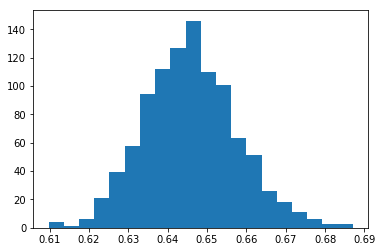

In [57]:
#Grab the mean ratios and append them to a list

random.seed(2)
mean_ratios = []

for i in range(1000):
    sample = get_random_sample(100)
    hs_college_ratio = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(hs_college_ratio.mean())
plt.hist(mean_ratios, 20)
plt.show()

## Experimenting with sampling and statistical analysis

Just a hypothetical example. Suppose the government enacted a 5-year program that enabled high school graduates to increase their income relative to college graduates. For simplicity sake, we will calculate the current income ratio of high school graduates and college graduates and increase that rate to 2.5%. Then we use the significance value to determine if our hypothesis is a success. Along the way I will do the following:

* Determine the "median_income" mean through sampling 100 counties.
* Check how much high school graduates earn relative to college graduates and test the ratio with the significance value.

In [20]:
#Obtain the mean of median_income
np.round(income["median_income"].mean(),2)

31063.09

In [10]:
#Create a function to select random samples

def get_random_sample(count):
    random_sample = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_sample]

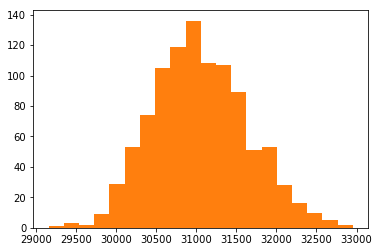

In [12]:
#Obtain mean of median income and graph it

random.seed(1)
random_income = [get_random_sample(100)["median_income"].mean() for i in range(1000)]
plt.hist(random_income, 20)
plt.show()

In [52]:
ratio = income["median_income_hs"] / income["median_income_college"]
np.round(ratio.mean(),2) * 100 + 2.5

67.5

In [54]:
#Compare the list of mean_ratios to our result ratio

significance_value = None
mean = len([m for m in mean_ratios if m >= .675])
significance_value = mean / len(mean_ratios)
significance_value

0.016

## Findings 

We have determined the mean ratio in our random sample of 100 counties that the "median_income" is \$31,063.09. Our significance value is 0.016. Based on the population sample, 1.6% of the time the wage results improved on their own. The experiment exceeded the significance value; therefore, the program improved the earnings of high school graduates relative to college graduates. 